# ¡Hola Carlos! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso.:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

----

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Carlos has realizado un estupendo proceso de Exploración y Análisis de Datos (EDA), demostrando una habilidad notable para preparar y ajustar los datos de manera meticulosa, lo cual es fundamental para desarrollar modelos predictivos robustos. Tu análisis inicial del desbalance de los datos muestra una comprensión profunda de los desafíos que pueden surgir en el procesamiento de conjuntos de datos complejos. Sin embargo, te sugiero explorar enfoques adicionales para abordar el desbalance de datos, como técnicas de sobremuestreo, submuestreo o el uso de algoritmos específicos para conjuntos de datos desbalanceados, lo que podría ayudarte a mejorar significativamente el rendimiento de tus modelos. Además, sería muy valioso que profundizaras en la interpretación de las métricas de evaluación como el F1-score y el AUC-ROC, ya que estos indicadores nos brindan información crucial sobre el comportamiento de nuestros modelos predictivos. Las indicaciones específicas que te he proporcionado en comentarios más abajo están diseñadas para guiarte hacia una conclusión exitosa del proyecto, ayudándote a desarrollar un análisis más completo y robusto. Recuerda que cada desafío en el análisis de datos es una oportunidad para aprender y crecer como profesional, así que mantén la curiosidad y la determinación. Estaré atento a tu próxima iteración 👀

</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Carlos excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil en futuros proyectos. ¡Éxito en tu próximo sprint! 🚀

</div>

---

# Objetivo

Se buscará predecir si un cliente del banco Beta Bank dejará el banco, para lo cual, mediante las diferentes herramientas de Machine Learning, se buscará abordar la situación y demostrarla mediante modelos prácticos. 

In [1]:
# importación de librerias y datos
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_absolute_error, mean_squared_error, roc_curve, roc_auc_score, r2_score, classification_report


data = pd.read_csv('/datasets/Churn.csv')

print(data.head())
print(data.columns)
data.info()

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo importando las liberías y cargando los datos del proyecto. Muy buen uso de las funciones `head` e `ìnfo`, esto nos permite tener una visión inical de los datos con los que estamos trabajando.

</div>

In [2]:
#eliminación de columnas que no son necesarias para el ejercicio
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Debido a que las columnas eliminadas no contienen datos representativos o que afecten el modelo, tomo la decisión de eliminarlo para poder ir segmentando la información que se usará para la prueba final.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buena decisión eliminar las columnas que no aportarían en el desarrollo del modelo predictivo

</div>

In [3]:
#prepocesamiento de base de datos
#ajuste de los nombre de las columnas
data = data.rename(columns={
    'NumOfProducts': 'Num_Of_Products',
    'HasCrCard': 'Has_Cr_Card',
    'IsActiveMember': 'Is_Active_Member',
    'EstimatedSalary': 'Estimated_Salary'
})
print(data.columns)

print(data.isna().sum())

data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

data.info()


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'Num_Of_Products', 'Has_Cr_Card', 'Is_Active_Member',
       'Estimated_Salary', 'Exited'],
      dtype='object')
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure              909
Balance               0
Num_Of_Products       0
Has_Cr_Card           0
Is_Active_Member      0
Estimated_Salary      0
Exited                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       10000 non-null  int64  
 1   Geography         10000 non-null  object 
 2   Gender            10000 non-null  object 
 3   Age               10000 non-null  int64  
 4   Tenure            10000 non-null  float64
 5   Balance           10000 non-null  float64
 6   Num_Of_Products   10000 non-null  int64 

In [4]:
#prepocesamiento de base de datos 2
new_columns_names = []

for columns in data.columns:
    name_lowered = columns.lower()
    new_columns_names.append(name_lowered)
data.columns = new_columns_names 

data.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

In [5]:
# utilización de One-Hot Encoding, para transformación de columnas categóricas en numéricas

categorical_columns = ['geography', 'gender']

categorical_columns_to_numerical = pd.get_dummies(data[categorical_columns], drop_first=True)

data_copy = data.copy()

data_copy = pd.concat([data_copy, categorical_columns_to_numerical], axis=1)

data_copy = data_copy.drop(columns=categorical_columns)

print(data_copy.head())
data_copy.info()

   creditscore  age  tenure    balance  num_of_products  has_cr_card  \
0          619   42     2.0       0.00                1            1   
1          608   41     1.0   83807.86                1            0   
2          502   42     8.0  159660.80                3            1   
3          699   39     1.0       0.00                2            0   
4          850   43     2.0  125510.82                1            1   

   is_active_member  estimated_salary  exited  geography_Germany  \
0                 1         101348.88       1                  0   
1                 1         112542.58       0                  0   
2                 0         113931.57       1                  0   
3                 0          93826.63       0                  0   
4                 1          79084.10       0                  0   

   geography_Spain  gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0    

In [6]:
# división del dataset para el modelo
target = data_copy['exited']
features = data_copy.drop(['exited'], axis=1)

# escalado de características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convertir a DataFrame para preservar índices y nombres de columnas
scaled_features_data = pd.DataFrame(scaled_features, columns=features.columns)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo preparando lo datos. Etapas como convertir los datos categorícos y escalar los valores numéricos son claves para poder crear modelos predictivos adecuados

</div>

0    0.7963
1    0.2037
Name: exited, dtype: float64


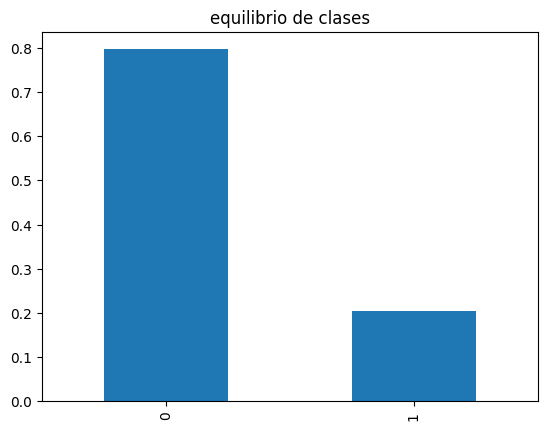

In [7]:
#evaluación del equilibrio de clases
class_frequency = target.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar',
                    title='equilibrio de clases'
                    )
plt.show()

Se busca mostrar el porcentaje de cada clase (1: cliente que se va, 0: cliente que permanece). Se considera que el dataset esta desequilibrado ya que una clase está significativamente más representada que la otra.

Aquí se evidencia que los clientes que permanecen representan un valor mucho mayor (79.63%) que los clientes que se van (20.37%)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Përfecto análisis del desbalance que tienen las clases

</div>

In [8]:
# Entrenamiento de modelo sin tener en cuenta el desequilibrio de clases
features_train, features_valid, target_train, target_valid = train_test_split(scaled_features_data, target, test_size=0.25, random_state=2117)

model = RandomForestClassifier(random_state=2117)
model.fit(features_train, target_train)

prediction_data = model.predict(features_valid)

initial_f1 = f1_score(target_valid, prediction_data)
roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])

print("F1 inicial:", initial_f1)
print("AUC-ROC inicial:", roc_auc)

F1 inicial: 0.5909090909090909
AUC-ROC inicial: 0.8567085390583018


En este caso los valores de F1 no indican si es muy efectivo o no el modelo. 
Pero para AUC-ROC se podría llegar a deducir que el modelo tiene un buen rendimiento discriminativo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente punto de partida. Ahora tenemos un valor de referencia para comparar ajustes en los datos.

</div>

In [9]:
# mejora en la calidad del modelo mediante sobremuestreo
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

repeat = 10
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

print(features_upsampled.shape)
print(target_upsampled.shape)


def upsample(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    arg1 = pd.concat([features_zeros] + [features_ones] * repeat)
    arg2 = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        arg1, arg2, random_state=12345
    )

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

print(features_upsampled.shape)
print(target_upsampled.shape)

# entrenamiento del modelo
model = RandomForestClassifier(random_state=2117, n_estimators=400, max_depth=80, min_samples_split=10, min_samples_leaf=4)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1_score_over = f1_score(target_valid, predicted_valid)
roc_auc_over = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])

print("F1 sobremuestreo:", f1_score_over)
print("AUC-ROC sobremuestreo:", roc_auc_over)

(5970, 11)
(1530, 11)
(5970,)
(1530,)
(21270, 11)
(21270,)
(21270, 11)
(21270,)
F1 sobremuestreo: 0.6165289256198349
AUC-ROC sobremuestreo: 0.8629087407504173


Use la técnica de sobremuestreo debido a que
las observaciones positivas eran notablemente inferiores a las negativas. No obstante, al entrenar el modelo, los valores de F1 se ven afectados de manera negativa, mientras que el valor AUC-ROC aumenta. 

In [10]:
# mejora en la calidad del modelo mediante submuestreo
print(features_train.shape)

features_train_sample = features_train.sample(frac=0.1, random_state=2117)
print(features_train_sample.shape)


def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=2117)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=2117)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=2117
    )

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

model = RandomForestClassifier(random_state=2117, n_estimators=400, max_depth=80, min_samples_split=10, min_samples_leaf=4)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1_score_sub = f1_score(target_valid, predicted_valid)
roc_auc_sub = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])

print("F1 submuestreo:", f1_score_sub)
print("AUC-ROC submuestreo:", roc_auc_sub)

(7500, 11)
(750, 11)
F1 submuestreo: 0.46025515210991175
AUC-ROC submuestreo: 0.8601030628897394


En este caso pasa lo mismo que en el escenario del sobremuestreo.

In [11]:
#mejora de la calidad del modelo

weighted_model = RandomForestClassifier(class_weight='balanced', random_state=2117)
weighted_model.fit(features_train, target_train)

# Predicción y evaluación del modelo ajustado
prediction_weighted = weighted_model.predict(features_valid)
weighted_f1 = f1_score(target_valid, prediction_weighted)
weighted_roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])

print("F1 con ajuste de peso:", weighted_f1)
print("AUC-ROC con ajuste de peso:", weighted_roc_auc)

F1 con ajuste de peso: 0.5614035087719299
AUC-ROC con ajuste de peso: 0.8601030628897394


En este caso con el ajuste de peso, se desajusto el valor de F1, bajando su efectividad.

In [12]:
# segunda mejora de la calidad del modelo
enhanced_model = RandomForestClassifier(random_state=2117, n_estimators=400, max_depth=80, min_samples_split=10, min_samples_leaf=4)
enhanced_model.fit(features_train, target_train)

# Predicción y evaluación del modelo mejorado
prediction_enhanced_model = enhanced_model.predict(features_valid)
enhanced_f1 = f1_score(target_valid, prediction_enhanced_model)
enhanced_roc_auc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])

print("F1 ajustado y mejorado:", enhanced_f1)
print("AUC-ROC ajustado y mejorado:", enhanced_roc_auc)

F1 ajustado y mejorado: 0.5739130434782609
AUC-ROC ajustado y mejorado: 0.8601030628897394


En este caso el valor de F1 mejora un poco con respecto a la mejora anterior, no obstante, sigue presentando un valor inferior al del primer modelo. 
Por otra parte el AUC-ROC sigue permaneciendo constante.

In [14]:
# prueba final
# Comparación final entre el modelo inicial, el modelo ajustado y el modelo mejorado
print("\nMétricas finales:")
print("Modelo inicial - F1:", initial_f1, "AUC-ROC:", roc_auc)
print("Modelo ajustado - sobremuestreo:", f1_score_over, "AUC-ROC:", roc_auc_over)
print("Modelo ajustado - submuestreo:", f1_score_sub, "AUC-ROC:", roc_auc_sub)
print("Modelo ajustado - F1:", weighted_f1, "AUC-ROC:", weighted_roc_auc)
print("Modelo ajustado y mejorado - F1:", enhanced_f1, "AUC-ROC:", enhanced_roc_auc)


Métricas finales:
Modelo inicial - F1: 0.5909090909090909 AUC-ROC: 0.8567085390583018
Modelo ajustado - sobremuestreo: 0.6165289256198349 AUC-ROC: 0.8629087407504173
Modelo ajustado - submuestreo: 0.46025515210991175 AUC-ROC: 0.8601030628897394
Modelo ajustado - F1: 0.5614035087719299 AUC-ROC: 0.8601030628897394
Modelo ajustado y mejorado - F1: 0.5739130434782609 AUC-ROC: 0.8601030628897394


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Cuando tenemos un escenario con un desbalance marcado en las clases, se esperaria que si usamos téccias de balanceo mejoren significativamente, de lo contrario posiblemente hay un problema en la técnica que estamos usando. En este caso, te recomiendo implementar técnicas como el **subsampling** y el **oversampling**, o inclusive el uso de **datos sintéticos**, recuerda que el enunciado del proyecto se pide usar por lo menos dos enfoques para tratar el desbalance. Acá te comparto un enlace con información que te puede ser útil: [link](https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/)

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Carlos excelente trabajo implementando las técnicas para trabajar con datos desbalanceados. Aunque el cambio puede parecer no muy significativo, es un punto de partida para seguir probando ajustes que puedan ayudar a lidiar con desequilibrio que existe en las clases objetivo.

</div>